In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('data.csv')

In [55]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [56]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [57]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Thus there is no missing values that need to handle

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [59]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [60]:
df['Over18'].unique() # Useless (Everyone over 18)
df['EmployeeCount'].unique() # Useless (Only 1)
df['StandardHours'].unique() # Useless (Everyone 80 hours)

array([80], dtype=int64)

In [61]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

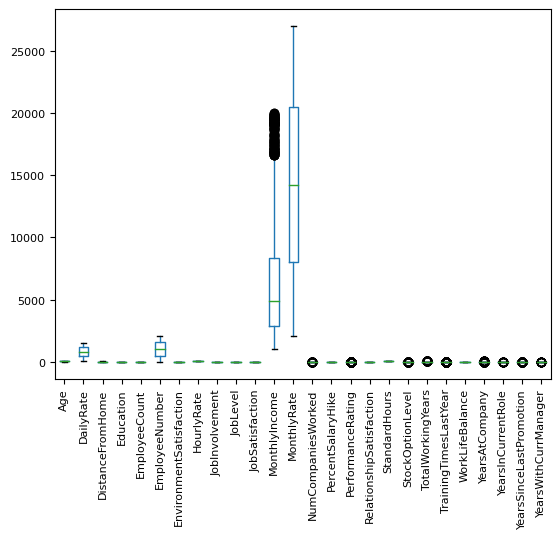

In [62]:
num_var = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

boxplot = df.boxplot(column = num_var, grid=False, rot=90, fontsize=8)  


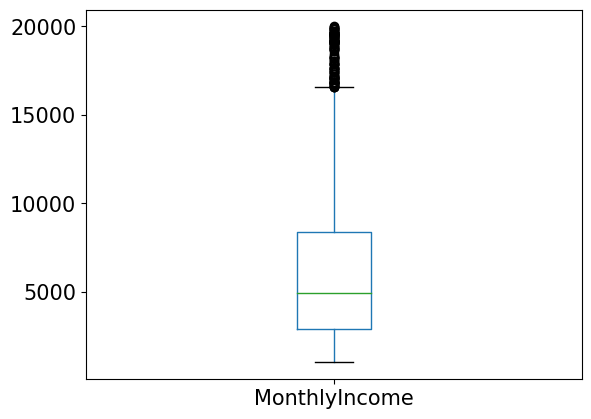

In [63]:
num_var_ = ['MonthlyIncome']
boxplot = df.boxplot(column = num_var_, grid=False, rot=0, fontsize=15)  

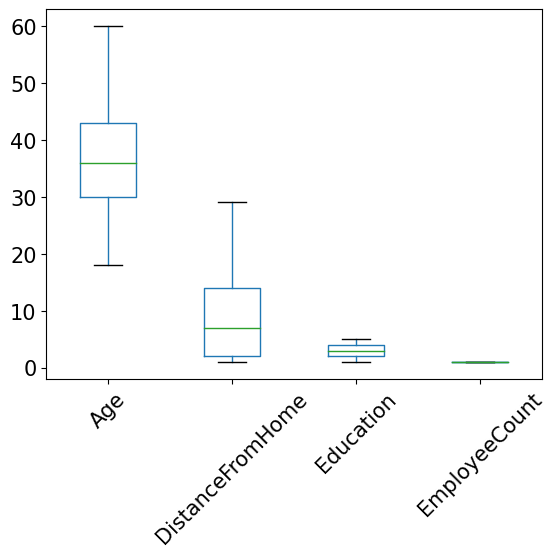

In [64]:
num_1 = ['Age','DistanceFromHome','Education','EmployeeCount']
boxplot = df.boxplot(column = num_1, grid=False, rot=45, fontsize=15)  

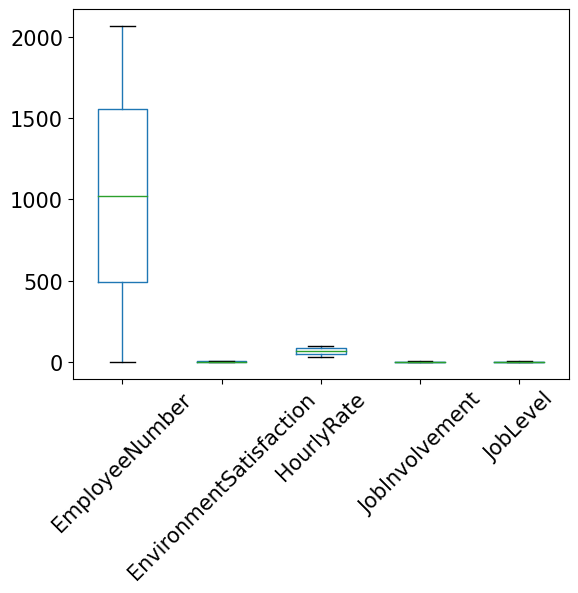

In [65]:
num_2 = ['EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel']
boxplot = df.boxplot(column = num_2, grid=False, rot=45, fontsize=15)  

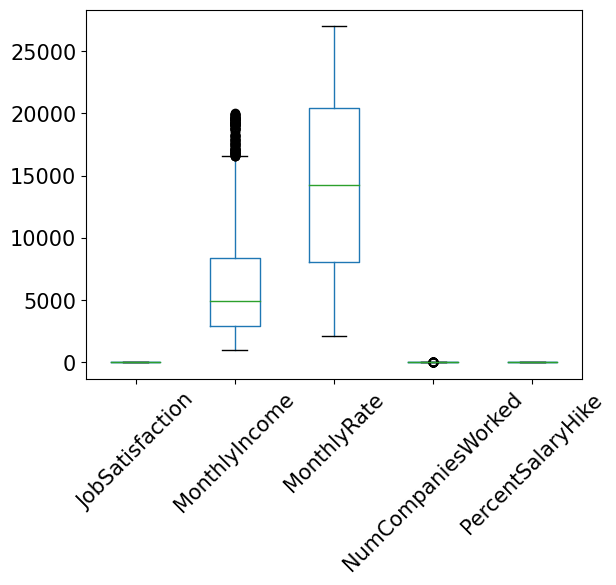

In [66]:
num_3 = ['JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3, grid=False, rot=45, fontsize=15)  

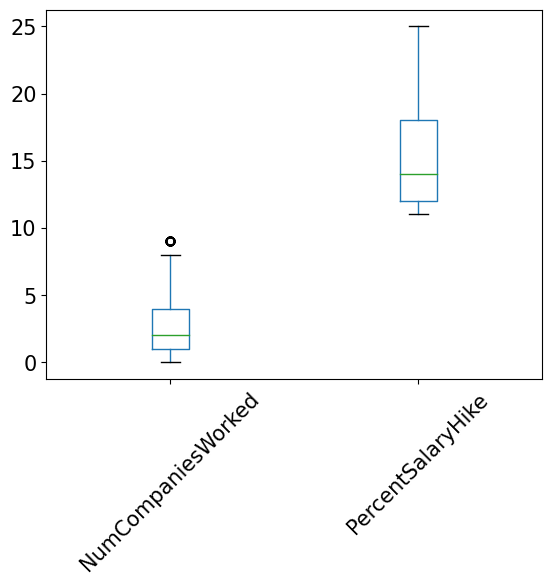

In [67]:
num_3_ = ['NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3_, grid=False, rot=45, fontsize=15)  

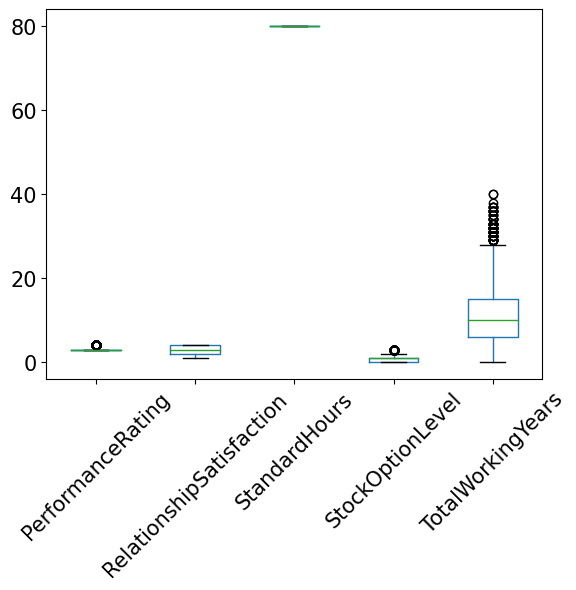

In [68]:
num_4 = ['PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4, grid=False, rot=45, fontsize=15)  

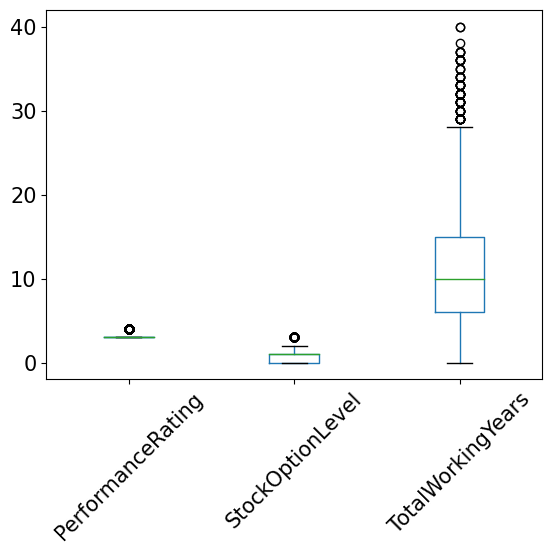

In [69]:
num_4_ = ['PerformanceRating','StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4_, grid=False, rot=45, fontsize=15)  

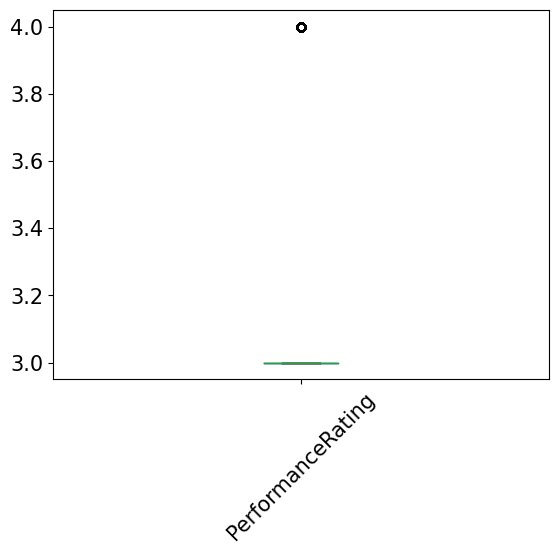

In [70]:
num_4__ = ['PerformanceRating']
boxplot = df.boxplot(column = num_4__, grid=False, rot=45, fontsize=15)  

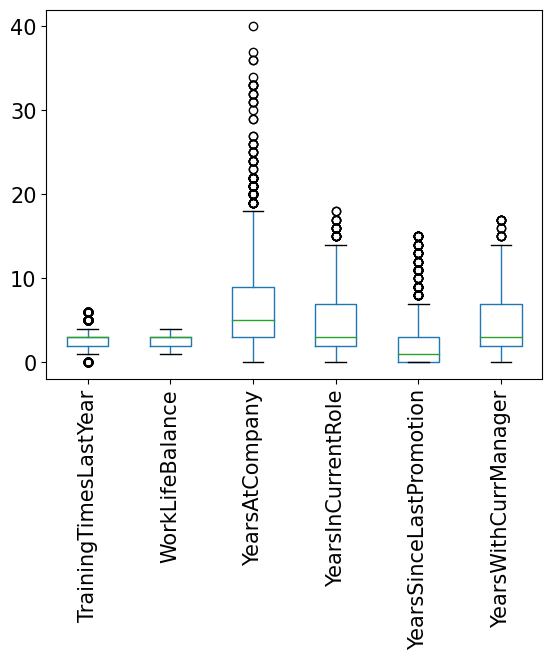

In [71]:
num_5 = ['TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
boxplot = df.boxplot(column = num_5, grid=False, rot=90, fontsize=15)  

In [72]:
# Outliers: [MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager] 

Text(0.5, 1.0, 'Attrition')

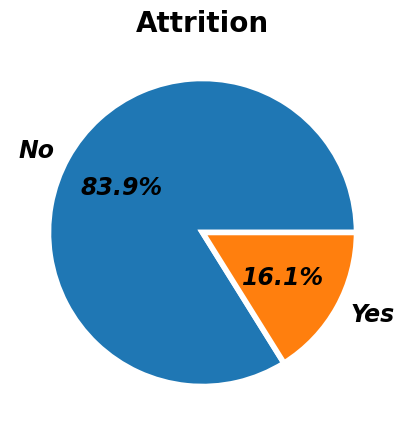

In [73]:
plt.figure(figsize=(5,5))
explode_val = (0,0.4,0,0.1)
df.groupby('Attrition')['Age'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':17,'style':'italic','fontweight':'bold'})
plt.title('Attrition', fontsize=20, fontweight='bold')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

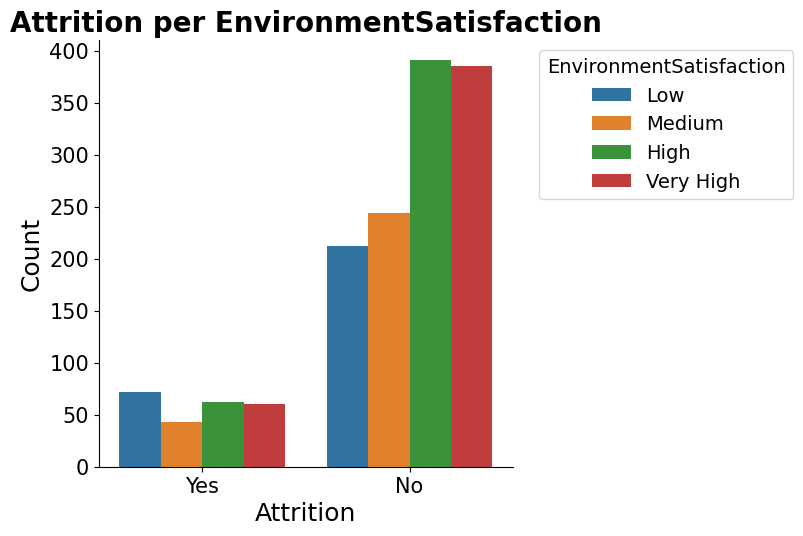

In [74]:
sns.catplot(x = 'Attrition', hue = 'EnvironmentSatisfaction', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='EnvironmentSatisfaction', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14, labels=['Low','Medium','High','Very High'])
plt.title('Attrition per EnvironmentSatisfaction', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

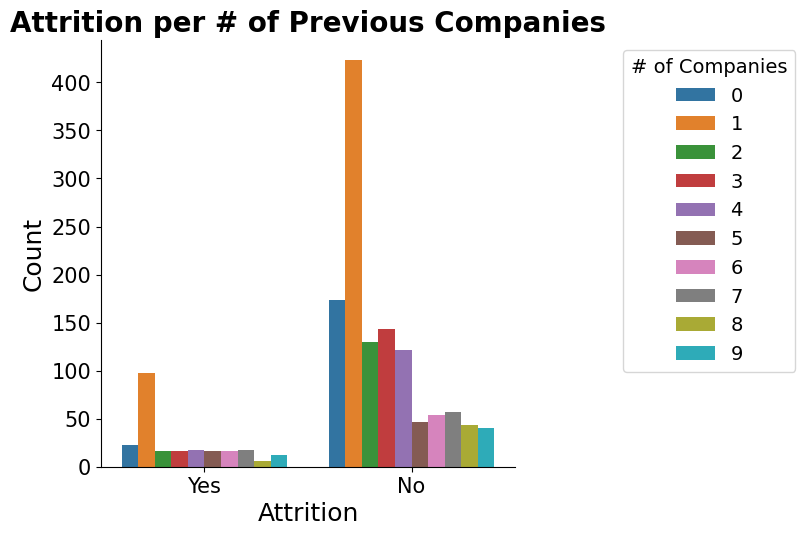

In [75]:
sns.catplot(x = 'Attrition', hue = 'NumCompaniesWorked', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='# of Companies', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per # of Previous Companies', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

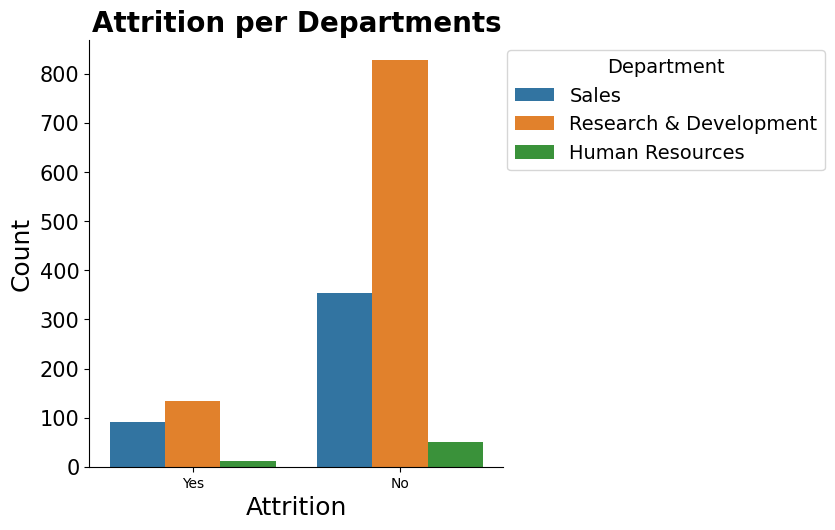

In [76]:
sns.catplot(x = 'Attrition', hue = 'Department', data=df, kind='count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Department', loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per Departments', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000')])

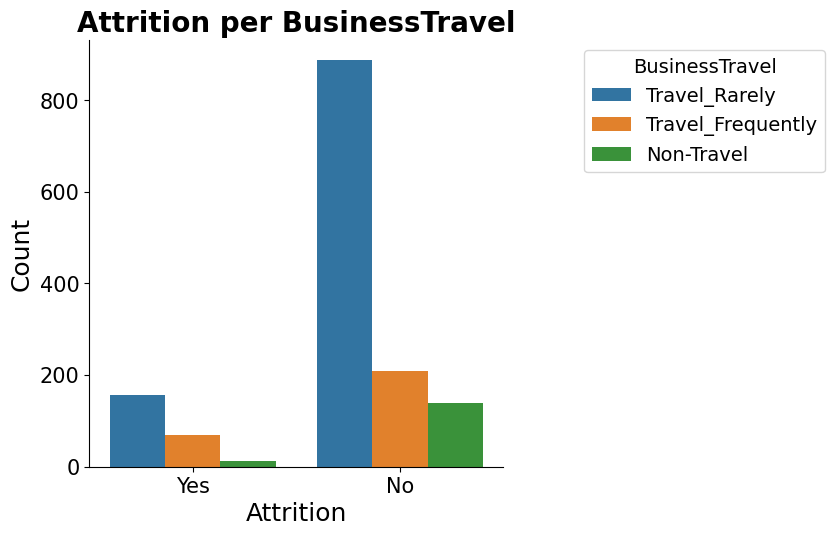

In [77]:
sns.catplot(x = 'Attrition', hue = 'BusinessTravel', data = df, kind = 'count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='BusinessTravel',loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per BusinessTravel', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Text(0.5, 1.0, 'Attrition per Education')

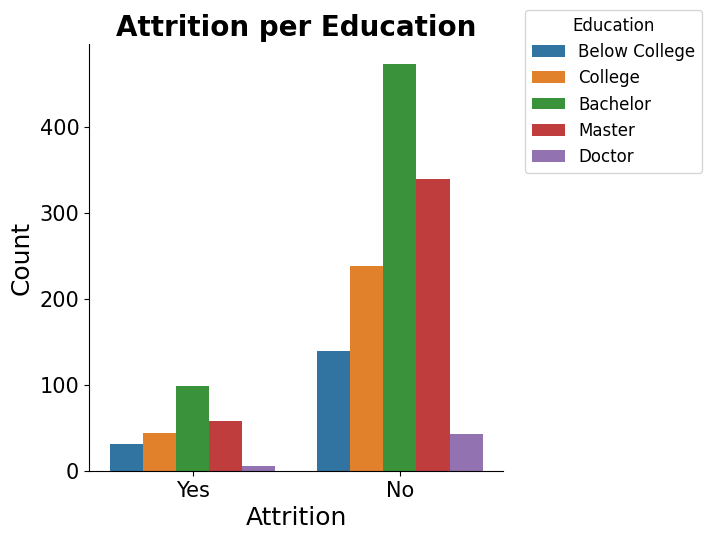

In [78]:
sns.catplot(x = 'Attrition', hue = 'Education', data = df, kind = 'count', legend = '')
plt.legend(title='Education', loc='upper right',labels=['Below College','College','Bachelor','Master','Doctor'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=12, title_fontsize=12)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Education', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per Gender')

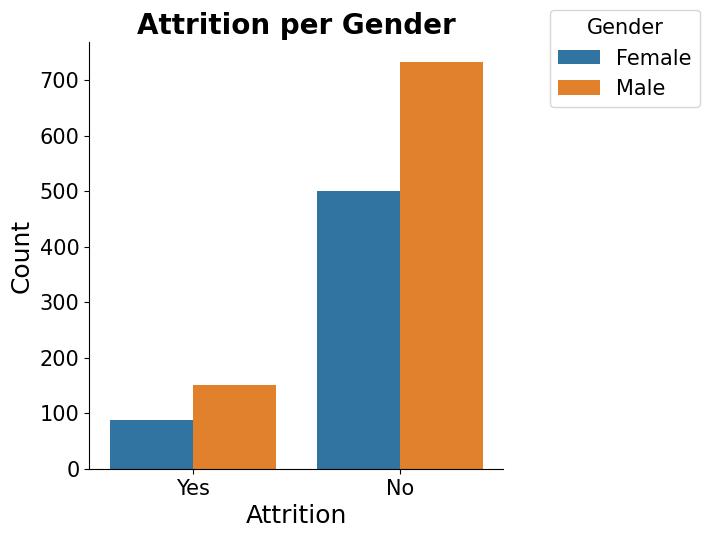

In [79]:
sns.catplot(x = 'Attrition', hue = 'Gender', data = df, kind = 'count', legend='')

plt.legend(title='Gender', loc='upper right',labels=['Female','Male'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Gender', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per JobSatisfaction')

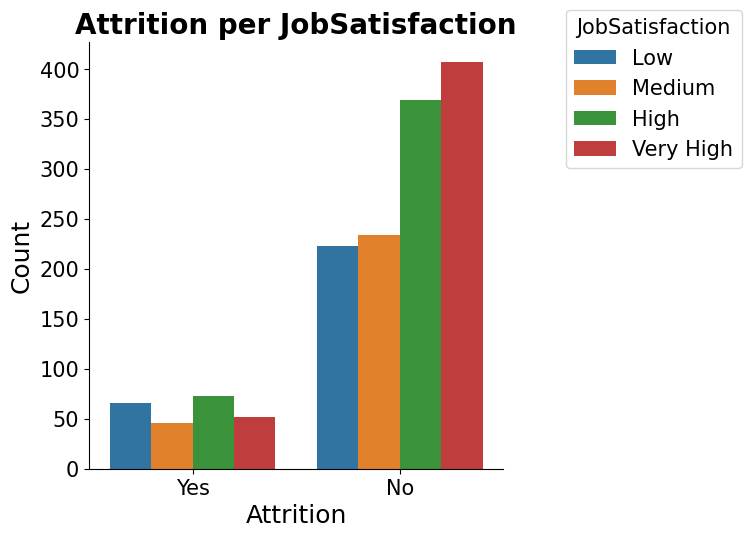

In [80]:
sns.catplot(x = 'Attrition', hue = 'JobSatisfaction', data = df, kind = 'count', legend='')

plt.legend(title='JobSatisfaction', loc='upper right',labels=['Low','Medium','High', 'Very High'],bbox_to_anchor =(1.3, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per JobSatisfaction', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per PerformanceRating')

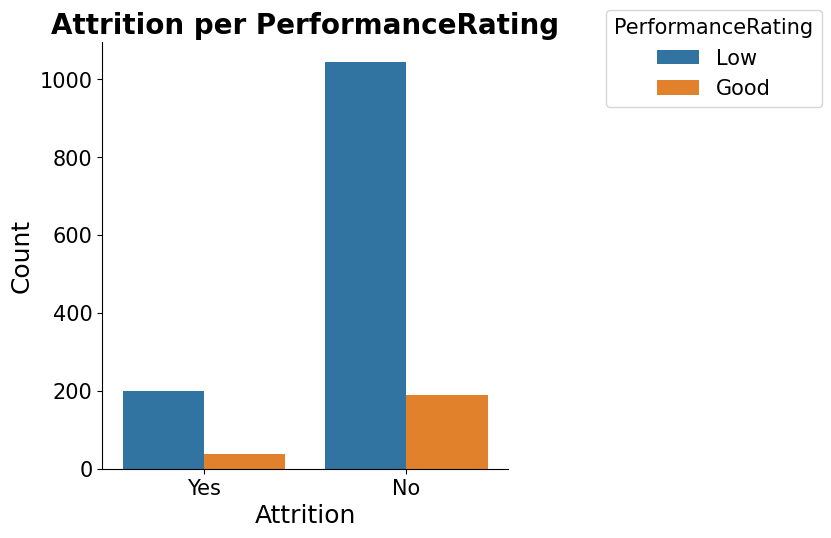

In [81]:
sns.catplot(x = 'Attrition', hue = 'PerformanceRating', data = df, kind = 'count', legend='')

plt.legend(title='PerformanceRating', loc='upper right',labels=['Low','Good'],bbox_to_anchor =(1.5, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per PerformanceRating', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per WorkLifeBalance')

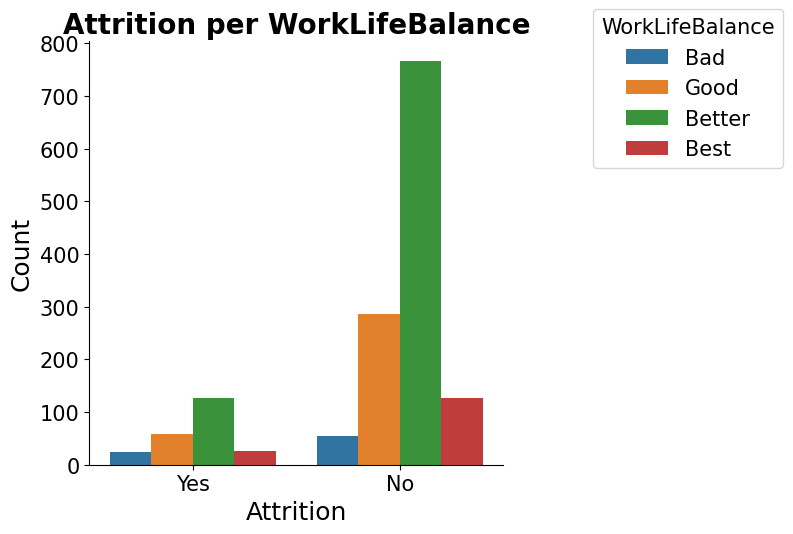

In [82]:
sns.catplot(x = 'Attrition', hue = 'WorkLifeBalance', data = df, kind = 'count', legend='')

plt.legend(title='WorkLifeBalance', loc='upper right',labels=['Bad','Good','Better','Best'], bbox_to_anchor =(1.4, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per WorkLifeBalance', fontsize=20, fontweight='bold')

# Feature selection and prepocessing

In [83]:
#features below are useless as proven by EDA steps hence we drop those four features
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

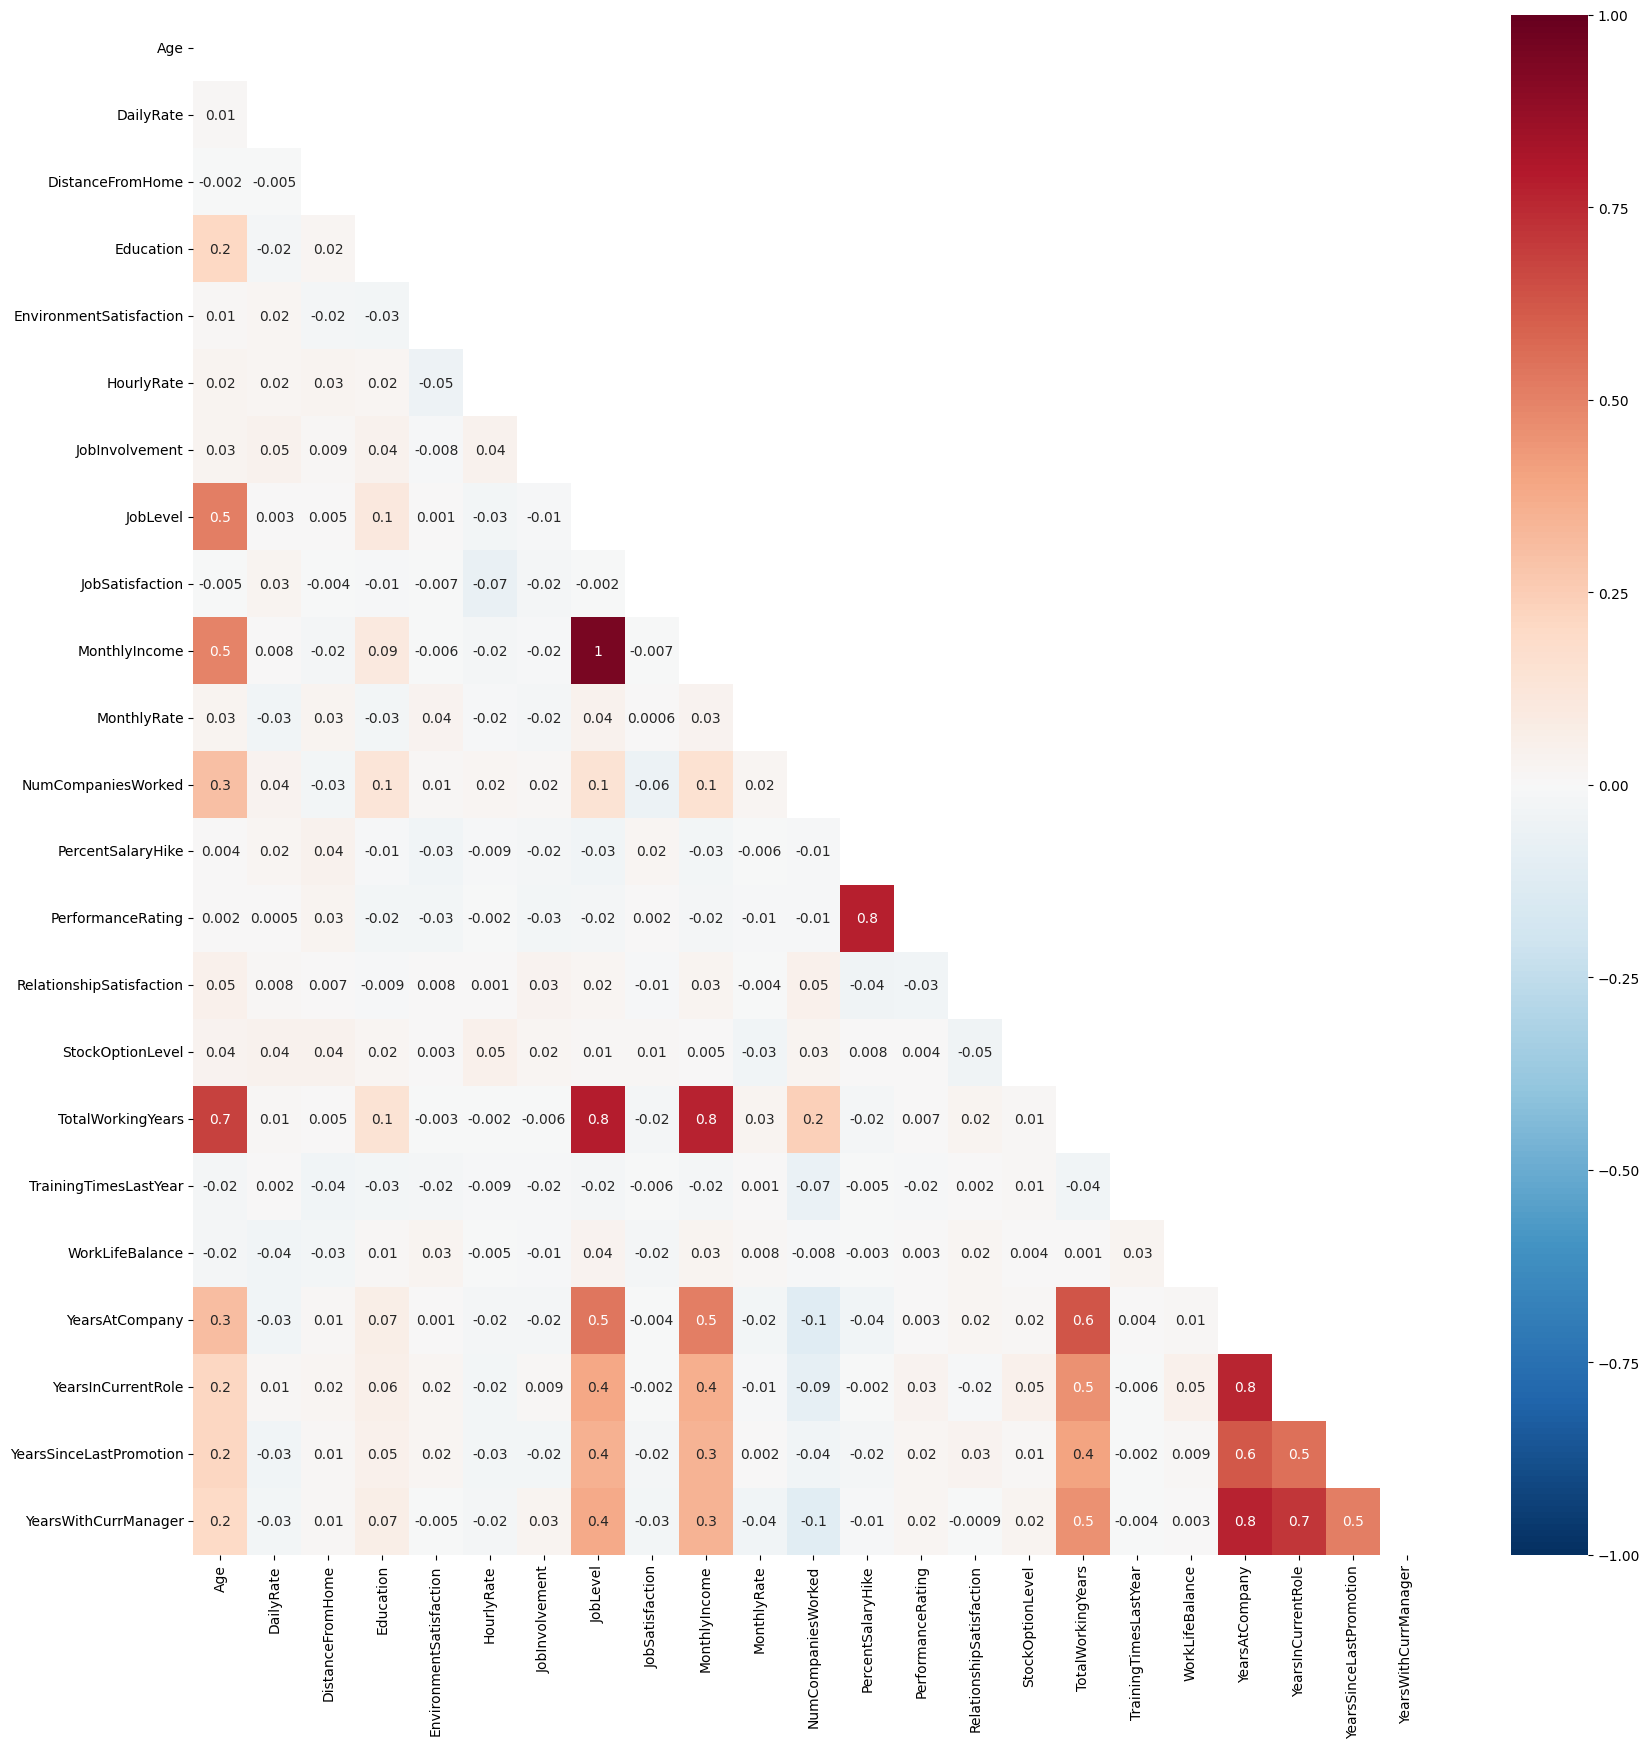

In [84]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

Some other conclusions we get from the correlation table:

1. Job level and total working years are highly correlated.
2. Monthly Income and total working years are highly correlated.
3. Performance rating and percentage salary hike are highly correlated.
4. Years in current role and years at company are highly correlated.
5. Years with current manager and years at company are highly correlated.
6. Monthly income and job level highly correlated

In [85]:
#attrition; business travel; department; education; gender; job role; marital status; overtime;

In [86]:
# Handling Categorical features

#binarize attrituion, Gender, OverTime and Attrition
df['Male'] = df.Gender == True
df.drop('Gender', axis = 1,inplace=True)
df['OverTime'] = df.OverTime == True
df['Attrition'] = df.Attrition == True

In [87]:
#encoding categorical features:

df = pd.get_dummies(df, columns=['Department',
                        'EducationField','JobRole','MaritalStatus'])

In [88]:
df.loc[df['BusinessTravel'] == 'Non-Travel'] = 0
df.loc[df['BusinessTravel'] == 'Travel_Rarely'] = .5
df.loc[df['BusinessTravel'] == 'Travel_Frequently'] = 1

In [89]:
df['BusinessTravel'] = df['BusinessTravel'].astype('int')
df['OverTime'] = df['OverTime'].astype('int')
df['Male'] = df['Male'].astype('int')

In [90]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
y = y.astype('int')

In [91]:
#Standardization
scaler = StandardScaler()
X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]=scaler.fit_transform(X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])
# handling outliers

In [92]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 229
Train attrition class = 947
Test attrition class = 48
Test attrition class = 246


In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 947
Train attrition class = 947
Test attrition class = 48
Test attrition class = 246


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#basic logistic regression model
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 1.0
report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00        48

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

ROC-AUC score1.0
Confusion Matrix : 
[[246   0]
 [  0  48]]


In [95]:
from xgboost import XGBClassifier
XGBoost = XGBClassifier(objective='binary:logistic',random_state=0,n_jobs=-1,use_label_encoder=False, eval_metric = 'aucpr', tree_method = 'gpu_hist')
param ={
    'reg_lambda': [0, 1e-1, 1, 10, 50],
    'n_estimators':range(100,1500,300),
    'eta':np.linspace(0.1,0.7,3),
}
# gs = GridSearchCV(estimator=finalPipe,param_grid=param,scoring = 'neg_root_mean_squared_error',n_jobs = -1,cv = 5,verbose = -1)
# finalPipe.set_params(gs.best_params_)

In [96]:
XGBoost.fit(X_train,y_train)
y_pred = XGBoost.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, XGBoost.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 1.0
report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00        48

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

ROC-AUC score1.0
Confusion Matrix : 
[[246   0]
 [  0  48]]


In [97]:
x = X_test
y = y_test

Text(0.5, 0, 'Xgboost Feature Importance')

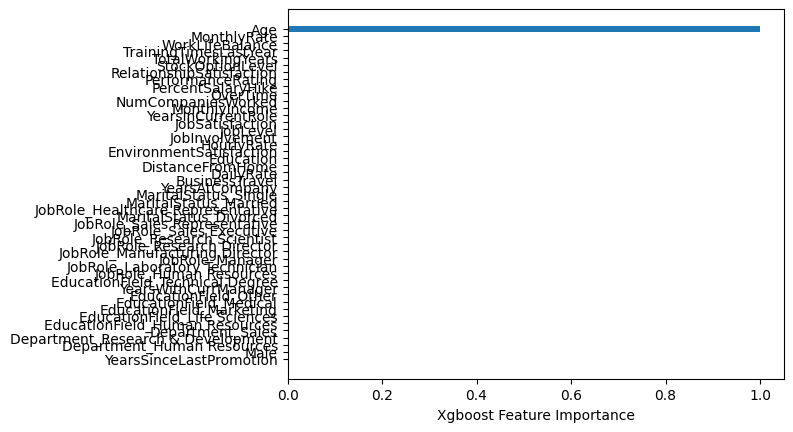

In [99]:
sorted_idx = XGBoost.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], XGBoost.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

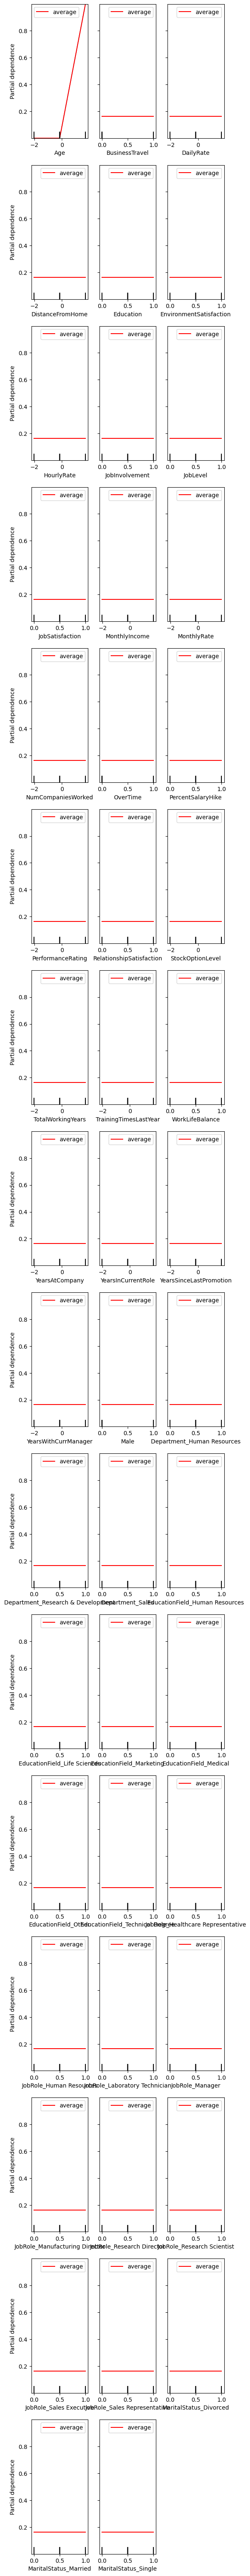

In [101]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(6, 80))
PartialDependenceDisplay.from_estimator(XGBoost, x, features=x.columns, kind ='both',ax=ax,line_kw={"color": "red"},ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},n_jobs=-1)

In [102]:
import shap

In [103]:
f = lambda x: XGBoost.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X.iloc[0:1000,:])

Permutation explainer: 1001it [00:30, 23.94it/s]                         


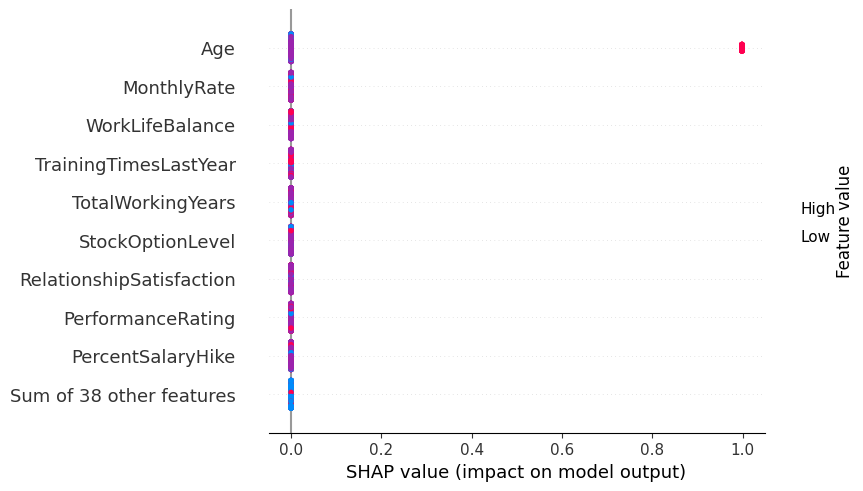

In [104]:
shap.plots.beeswarm(shap_values)

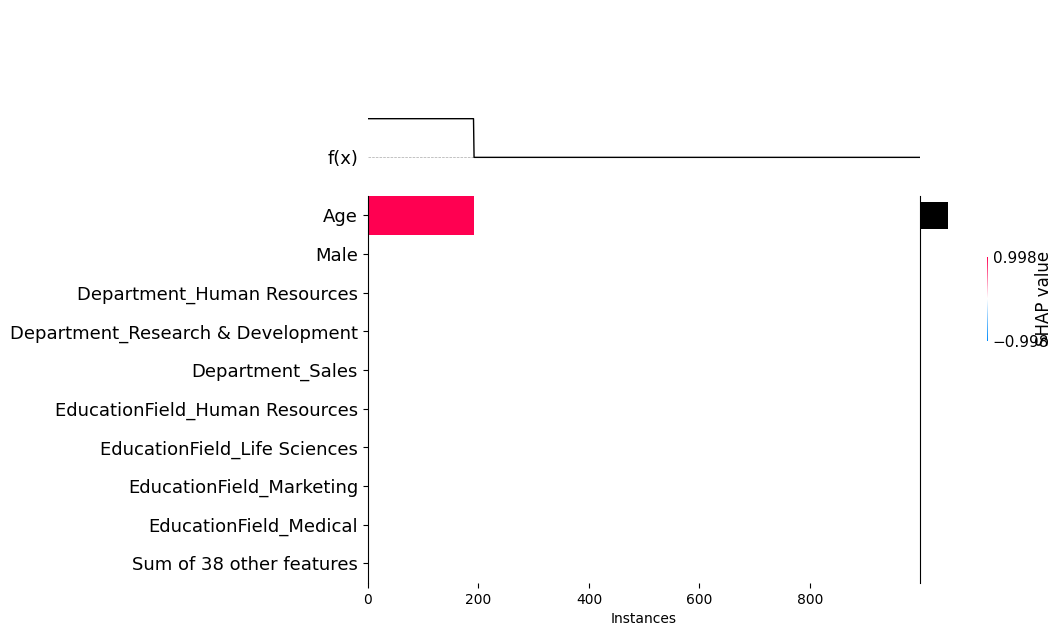

In [105]:
shap.plots.heatmap(shap_values)

In [110]:
shap.initjs()
explainer = shap.KernelExplainer(XGBoost.predict_proba, x)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

Using 294 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/294 [00:00<?, ?it/s]